# League of Legends (LoL) Match Outcome Predictor

## Introduction
This project was the final assignment for the **PyTorch Basics for Machine Learning** course on **edX**, provided by **IBM**. The objective was to apply the machine learning techniques I learned throughout the course to a real-world dataset, using PyTorch to predict the outcomes of League of Legends (LoL) matches based on historical data. League of Legends, a widely popular multiplayer online battle arena (MOBA) game, generates a wealth of data from each match. This provides a unique opportunity to apply machine learning methods to gain insights and make predictions based on real-world gaming scenarios.

### Scope of the Project
This project uses a dataset containing features that describe key aspects of each match:
- **win** (target variable): binary (1 = win, 0 = loss)
- **kills**: total number of kills by the team
- **deaths**: total number of deaths by the team
- **assists**: total number of assists by the team
- **gold_earned**: total gold earned by the team
- **cs** (creep score): total number of minions killed by the team
- **wards_placed**: total number of wards placed by the team
- **wards_killed**: total number of wards killed by the team
- **damage_dealt**: total damage dealt by the team

The project involves data preprocessing, feature engineering, and the application of machine learning models to predict the **win** outcome. 

### Tools & Libraries Used

The project was developed using the following tools and libraries:
- **Python** - the programming language
- **pandas** - Used to load and handle the dataset and perform data manipulation.
- **PyTorch** - Used to build and train the regression model, provides neural network layers and other tools to define the model architecture and is used for optimizing the model parameters during training.
- **scikit-learn** - Used to split the data into training and testing sets, to standardize the data and to evaluate the model's performance.
- **matplotlib** - Used for creating visualizations.


### Objective

The primary objective of this project is to build and evaluate a machine learning model capable of accurately predicting the outcome (win or loss) of **League of Legends** matches based on key in-game statistics.

## Setup

In [10]:
# Install the required libraries
%pip install pandas
%pip install scikit-learn
%pip install torch
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Step 1: Data Loading and Preprocessing  
We start by importing the necessary libraries for data manipulation, preprocessing, and building our model using PyTorch.

The dataset, consisting of match statistics from League of Legends games, is loaded from a CSV file. The target variable `win` is binary (0 = loss, 1 = win), and all other columns represent features such as kills, assists, gold earned, and more.

To prepare the data for training:

1. **Split Features and Target:**  
   - We separate the dataset into features `X` and labels `y`.

2. **Train-Test Split:**  
   - We divide the data into training and testing sets using an 80-20 split to evaluate model performance later.

3. **Standardization:**  
   - We apply standard scaling (`StandardScaler`) to normalize feature values, which helps speed up learning and ensures fair treatment of all input variables.

4. **Convert to PyTorch Tensors:**  
   - Finally, the preprocessed NumPy arrays are converted into PyTorch tensors so they can be used directly in the model training pipeline.

This preprocessing ensures that our data is clean, scaled appropriately, and compatible with PyTorch's deep learning framework.

In [11]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Loading dataset
LoL_data = pd.read_csv("league_of_legends_data_large.csv")

# Split data into X and y
X = LoL_data.drop('win', axis=1)
y = LoL_data['win']
# Uncomment the following to see it split correctly:
# display(X.head())
# display(y.head()) 

# Create Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Uncomment the following to see it did so correctly:
# display(f'X_train shape: {X_train.shape}')
# display(f'y_train shape: {y_train.shape}')
# display(f'X_test shape: {X_test.shape}')
# display(f'y_test shape: {y_test.shape}')

# Standardize the data
# Initialize StandardScaler
scaler = StandardScaler()
# Fit on training data and transform, same with test data 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

## Step 2: Logistic Regression Model  
In this section, we define and initialize a logistic regression model using PyTorch. While logistic regression is a relatively simple machine learning model, it's a solid choice for binary classification problems like predicting match outcomes (win or lose).

1. **Model Architecture:**
   - We define a custom `LogisticRegressionModel` class that inherits from `nn.Module`.
   - The model consists of a single linear layer followed by a sigmoid activation function to output probabilities between 0 and 1.

2. **Input Dimension:**
   - We dynamically determine the number of input features from the training data to ensure the model is configured correctly.

3. **Loss Function:**
   - We use `BCELoss` (Binary Cross-Entropy Loss), which is well-suited for binary classification tasks.

4. **Optimizer:**
   - The model’s parameters are optimized using Stochastic Gradient Descent (SGD) with a learning rate of 0.01.

This setup provides the foundation for training a binary classifier that learns to predict the probability of a win based on match statistics.

In [12]:
# Create LogisticRegressionModel class
class LogisticRegressionModel(nn.Module):
    # Constructor
    def __init__(self, n_inputs):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

# Get input dimension
input_dim = X_train.shape[1]

# Initialize model
model = LogisticRegressionModel(input_dim)

# Define Loss function
criterion = nn.BCELoss()

# Set up optimizer
optimizer =  optim.SGD(model.parameters(), lr=0.01)

## Step 3: Model Training  
In this section, we train the logistic regression model using binary cross-entropy loss over 1000 epochs. For each epoch, we follow the standard machine learning pipeline:

1. **Training Phase:**
    - Set the model to training mode.
    - Perform a forward pass with the training data.
    - Calculate the loss between predicted values and true labels.
    - Perform backpropagation to compute gradients.
    - Update the model weights using stochastic gradient descent (SGD).

2. **Evaluation Phase:**
    - Switch the model to evaluation mode and disable gradient tracking.
    - Compute predictions for both training and testing data.
    - Apply a threshold of 0.5 to convert predicted probabilities into binary class labels (win or not).
    - Calculate and store accuracy scores for both training and testing datasets.

The loss is printed every 100 epochs to monitor learning progress. After training is complete, the final training and testing accuracy are displayed.

In [13]:
# Set the number of epochs
epochs = 1000

for epoch in range(epochs):
    # Training phase
    model.train()
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    outputs = model(X_train).squeeze()
    # Calculate loss
    loss = criterion(outputs, y_train.float()) 
    # Backpropagation
    loss.backward() 
    # Update weights
    optimizer.step()
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        # Get predicted probabilities
        train_preds = model(X_train).squeeze()
        test_preds = model(X_test).squeeze()
        
        # Apply threshold of 0.5 to get binary predictions (0 or 1)
        train_pred_labels = (train_preds >= 0.5).long()
        test_pred_labels = (test_preds >= 0.5).long()

        # Compare with actual labels and compute accuracy
        train_accuracy = (train_pred_labels == y_train).sum().item() / len(y_train)
        test_accuracy = (test_pred_labels == y_test).sum().item() / len(y_test)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch [100/1000], Loss: 0.7174
Epoch [200/1000], Loss: 0.7054
Epoch [300/1000], Loss: 0.6977
Epoch [400/1000], Loss: 0.6930
Epoch [500/1000], Loss: 0.6900
Epoch [600/1000], Loss: 0.6882
Epoch [700/1000], Loss: 0.6871
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6860
Epoch [1000/1000], Loss: 0.6857
Train Accuracy: 54.62%
Test Accuracy: 50.50%


## Step 4: Model Optimization and Evaluation  
In this section, we train the logistic regression model with **L2 regularization** (using weight decay) over 1000 epochs. The steps of training and evaluation have been explained earlier, but here’s a summary of important additions:

1. **Set Up the Optimizer with L2 Regularization**
    L2 regularization is used to prevent overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions. 

2. **Training and Evaluation Phases**
    After setting up the optimizer with L2 regularization, we proceed with the standard training and evaluation pipeline as described earlier.
    - **Training Phase:**
        - The model undergoes forward passes, loss calculation, backpropagation, and weight updates for each epoch.
        - The optimizer uses the gradients to adjust the model parameters during training while considering the regularization term to keep the model weights smaller and prevent overfitting.
    - **Evaluation Phase:**
        - During evaluation, we disable gradient tracking with torch.no_grad() to reduce memory usage and computational overhead.
        - The model is then tested on both the training and test datasets, and accuracy scores are computed.





In [19]:
# Initialize the optimizer with L2 Regularization
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Set the number of epochs
epochs = 1000
for epoch in range(epochs):
    # Training phase
    model.train()
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    outputs = model(X_train).squeeze()
    # Calculate loss
    loss = criterion(outputs, y_train.float()) 
    # Backpropagation
    loss.backward() 
    # Update weights
    optimizer.step()
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        # Get predicted probabilities
        train_preds = model(X_train).squeeze()
        test_preds = model(X_test).squeeze()
        
        # Apply threshold of 0.5 to get binary predictions (0 or 1)
        train_pred_labels = (train_preds >= 0.5).long()
        test_pred_labels = (test_preds >= 0.5).long()

        # Compare with actual labels and compute accuracy
        train_accuracy = (train_pred_labels == y_train).sum().item() / len(y_train)
        test_accuracy = (test_pred_labels == y_test).sum().item() / len(y_test)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch [100/1000], Loss: 0.6895
Epoch [200/1000], Loss: 0.6878
Epoch [300/1000], Loss: 0.6868
Epoch [400/1000], Loss: 0.6862
Epoch [500/1000], Loss: 0.6858
Epoch [600/1000], Loss: 0.6856
Epoch [700/1000], Loss: 0.6855
Epoch [800/1000], Loss: 0.6854
Epoch [900/1000], Loss: 0.6854
Epoch [1000/1000], Loss: 0.6853
Train Accuracy: 55.00%
Test Accuracy: 50.50%


## Step 5: Visualization and Interpretation  
In this section, we evaluate the performance of the trained model by visualizing its predictions using a **confusion matrix**, printing the **classification report**, and plotting the **ROC curve** (Receiver Operating Characteristic).

1. **Confusion Matrix**
    
    The confusion matrix is a useful tool for understanding the performance of the model by comparing the true labels (`y_test`) with the predicted labels (`test_pred_labels`). It helps identify how many instances were correctly or incorrectly classified for each class.
    **Steps for Plotting Confusion Matrix:**
    - **Prediction:** First, we threshold the predicted probabilities (`test_preds`) to obtain binary predictions (0 or 1).
    - **Matrix Calculation:** The confusion matrix is calculated using the `confusion_matrix()` function from sklearn.metrics.
    - **Plot:** The confusion matrix is visualized using `matplotlib` with labeled axes for `Class 0` (negative) and `Class 1` (positive). The intensity of the colors in the matrix indicates the number of instances in each category.

2. **Classification Report**
    
    The classification report provides detailed metrics about the model's performance, including **precision**, **recall**, **f1-score**, and **support** for each class. These metrics give a more complete picture of how well the model performs on both classes.
    - **Precision** - How many predicted positives were actually positive (minimizing false positives).
    - **Recall** - How many actual postives were correctly predicted (minimizing false negatives).
    - **F1-Score** - A balance between precision and recall (If high both false positives and false negatives are minimized, If low it seems there is some sort of inbalance).
    - **Support** - The number of true instances for each class in the dataset.

3. **ROC Curve** 
    
    The ROC curve helps to evaluate the classification performance across different thresholds. It plots the **False Positive Rate** (FPR) on the x-axis and the **True Positive Rate** (TPR) on the y-axis, showing how well the model distinguishes between classes.
    - The area under the ROC curve (AUC) is also calculated, providing a single number that summarizes the model's ability to discriminate between the two classes.

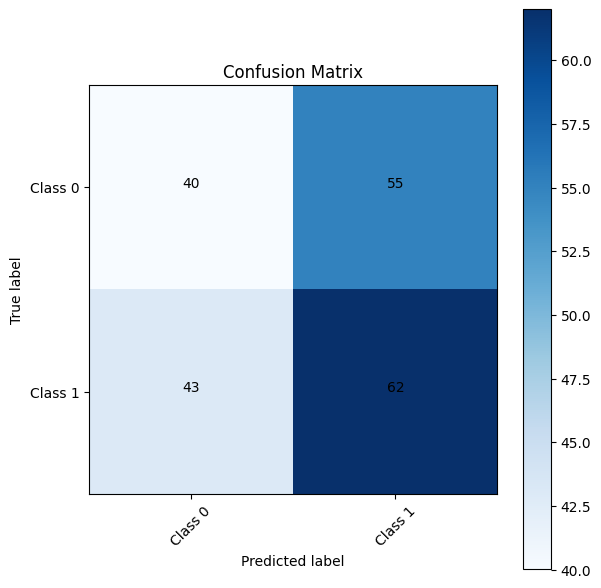

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.48      0.42      0.45        95
     Class 1       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



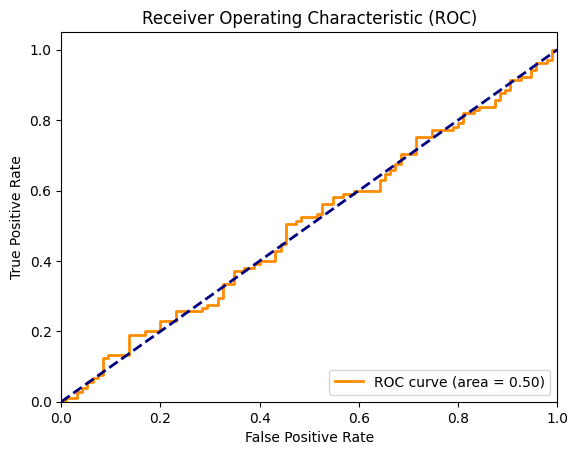

In [15]:
## Confusion matrix
# Convert predictions to binary labls by applying a threshold of 0.5
test_pred_labels = (test_preds > 0.5).float()
# Compute the confusion matrix
cm = confusion_matrix(y_test, test_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)    # Use blue color map for visualization
plt.title('Confusion Matrix')
plt.colorbar()  # Show color bar for reference
tick_marks = range(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45) # Label x-axis as Class 0 and Class 1
plt.yticks(tick_marks, ['Class 0', 'Class 1'])  # Label y-axis as Class 0 and Class 1


# Add text annotations in the confusion matrix cells
thresh = cm.max() / 2   # Set the threshold for text color (white for high values, black for low)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="black" if cm[i, j] > thresh else "red")

plt.tight_layout() # Adjust layout for better fit
plt.ylabel('True label') # Label for y-axis
plt.xlabel('Predicted label') # Label for x-axis
plt.show() # Display confusion matrix plot

## Print classification report
print("Classification Report:\n", classification_report(y_test, test_pred_labels, target_names=['Class 0', 'Class 1']))

## ROC curve
# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
# Calculate AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')    # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])    # Set x-axis limits (False Positive Rate)
plt.ylim([0.0, 1.05])   # Set y-axis limits (True Positive Rate)
plt.xlabel('False Positive Rate')   # Label for x-axis
plt.ylabel('True Positive Rate')    # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC)')    # Title of the plot
plt.legend(loc="lower right")   # Legend in the lower right corner
plt.show()  # Display ROC curve plot

The model demonstrates poor classification performance, with an accuracy of 51% and an ROC AUC of 0.50, indicating it performs no better than random guessing. Precision, recall, and F1-scores are low for both classes, especially Class 0, which shows a recall of only 42%. These results suggest that the model is struggling to learn meaningful patterns from the data and requires further optimization, such as better feature engineering, model tuning, or addressing potential data quality issue.

## Step 6: Model Saving and Loading  
In this section, we demonstrate how to save a trained model, reload it, and evaluate its performance.

1. **Save the Model**
    
    The model's state dictionary (which includes the learned weights) is saved to a file. This allows you to persist the model and load it later without retraining.

2. **Load the Model**
    
    To reload the saved model, we first initialize the model structure (i.e., the same architecture) and then load the saved state dictionary into the model.

3. **Evaluate the Reloaded Model**
    
    After loading the model, we set it to evaluation mode to ensure that any layers like dropout or batch normalization work correctly during inference (i.e., testing). In evaluation mode, these layers behave differently than in training mode.
    We evaluate the reloaded model by making predictions on the test set and comparing them to the actual labels. We also calculate the accuracy as a performance metric.


In [16]:
# Save the model
torch.save(model.state_dict(), 'trained_LoLmodel.pth')

# Load the model
n_inputs = X_train.shape[1]
model_reloaded = LogisticRegressionModel(n_inputs)
model_reloaded.load_state_dict(torch.load('trained_LoLmodel.pth'))

# Ensure the loaded model is in evaluation mode
model_reloaded.eval()

# Evaluate the loaded model
with torch.no_grad():  
    # Forward pass through the model on the test set
    test_preds_reloaded = model_reloaded(X_test)
    test_preds_labels_reloaded = (test_preds_reloaded >= 0.5).long()

    # Calculate accuracy or any other evaluation metrics
    test_accuracy_reloaded = (test_preds_labels_reloaded == y_test).float().mean()
print(f"Test Accuracy of Reloaded Model: {test_accuracy_reloaded:.4f}")

Test Accuracy of Reloaded Model: 0.5042


## Step 7: Hyperparameter Tuning  
In this section, we test different learning rates to find the one that yields the best test accuracy for our logistic regression model. The learning rates are tested over a fixed number of epochs to evaluate their performance.

1. **Initialize Hyperparameters and Variables**
    
    We start by defining the learning rates to test, the number of epochs for training, and variables to track the best test accuracy and corresponding learning rate.

2. **Test Each Learning Rate**
    
    We loop through each learning rate, reinitialize the model, and reinitialize the optimizer with the current learning rate for each iteration.

3. **Train and Evaluate the Model**
    
    For each learning rate, we train the model over the specified number of epochs. During each epoch, we perform the standard training steps: forward pass, calculate loss, backpropagation, and weight update. After training, we evaluate the model on the test dataset by making predictions and calculating the accuracy.

4. **Track the Best Learning Rate**
    
    We compare the test accuracy for each learning rate and track the best learning rate based on the highest test accuracy.

5. **Report the Best Learning Rate**
    
    Finally, after testing all the learning rates, we report the best learning rate along with the corresponding test accuracy.


In [17]:
# List of learning rates to test
learning_rates = [0.01, 0.05, 0.1]
epochs = 50  # Number of epochs for each test
best_accuracy = 0  # To track the best test accuracy
best_lr = 0  # To track the best learning rate
n_inputs=X_train.shape[1]

# Loop through each learning rate to test
for lr in learning_rates:
    # Reinitialize the model
    model = LogisticRegressionModel(n_inputs)
    
    # Reinitialize the optimizer with the current learning rate
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # Loss function
    criterion = nn.BCELoss()
    
    # Train the model
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train).squeeze()
        loss = criterion(outputs, y_train.float())  # Ensure target is float for BCELoss
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the test dataset
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test)
        test_preds_labels = (test_preds >= 0.5).long()  # Apply threshold for binary classification
        
        # Calculate test accuracy
        test_accuracy = (test_preds_labels == y_test).float().mean().item()
        print(f"Test Accuracy for Learning Rate {lr}: {test_accuracy:.4f}")
        
        # Track the best learning rate based on test accuracy
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr

# Report the best learning rate
print(f"The best learning rate is {best_lr} with a test accuracy of {best_accuracy:.4f}")

Test Accuracy for Learning Rate 0.01: 0.5010
Test Accuracy for Learning Rate 0.05: 0.4972
Test Accuracy for Learning Rate 0.1: 0.5002
The best learning rate is 0.01 with a test accuracy of 0.5010


## Step 8: Feature Importance  

In this section, we extract and visualize the feature importances of the trained logistic regression model to understand which features contribute the most to the model's predictions.

1. **Extract the Weights of the Linear Layer**
    
    We retrieve the weights from the linear layer of the model, which represent the importance of each feature. These weights are stored in the model's linear layer, and we flatten the tensor to make it a 1D array for easy processing.

2. **Create a DataFrame for Feature Importance**

    We create a DataFrame that holds the feature names and their corresponding importance values (weights). This will allow us to easily sort and visualize the importance of each feature.

3. **Sort the Features by Importance**

    The features are sorted in descending order by their absolute importance value, so the most influential features appear at the top.

4. **Visualize the Feature Importances**

    We plot the feature importances using a bar chart to visually highlight which features are the most important. This visualization will help in understanding how each feature contributes to the model’s predictions.

        Feature  Importance
5  wards_placed    0.177941
1        deaths    0.066352
3   gold_earned    0.065865
0         kills   -0.013070
7  damage_dealt   -0.038316
2       assists   -0.073736
6  wards_killed   -0.073924
4            cs   -0.099053


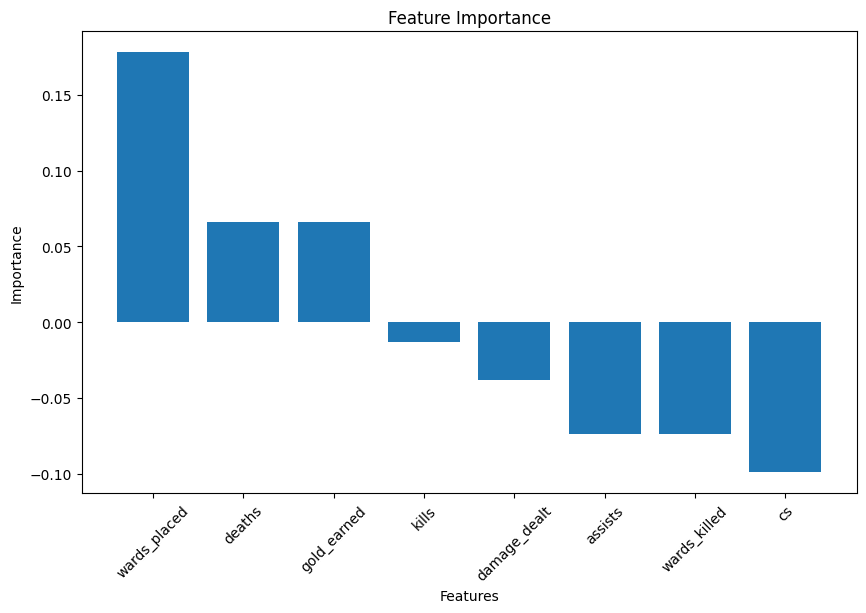

In [18]:
# Extract the weights of the linear layer
feature_importance = model.linear.weight.data.numpy().flatten()
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by the absolute importance value
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()